# DecissionTree on ChurnData dataset

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('ChurnData.csv')
print(df)

     tenure  age  address  income  ed  employ  equip  callcard  wireless  \
0        11   33        7     136   5       5      0         1         1   
1        33   33       12      33   2       0      0         0         0   
2        23   30        9      30   1       2      0         0         0   
3        38   35        5      76   2      10      1         1         1   
4         7   35       14      80   2      15      0         1         0   
..      ...  ...      ...     ...  ..     ...    ...       ...       ...   
195      55   44       24      83   1      23      0         1         0   
196      34   23        3      24   1       7      0         1         0   
197       6   32       10      47   1      10      0         1         0   
198      24   30        0      25   4       5      0         1         1   
199      61   50       16     190   2      22      1         1         1   

     longmon  ...  pager  internet  callwait  confer  ebill  loglong  logtoll  \
0     

In [66]:
df.isnull().sum()

tenure      0
age         0
address     0
income      0
ed          0
employ      0
equip       0
callcard    0
wireless    0
longmon     0
tollmon     0
equipmon    0
cardmon     0
wiremon     0
longten     0
tollten     0
cardten     0
voice       0
pager       0
internet    0
callwait    0
confer      0
ebill       0
loglong     0
logtoll     0
lninc       0
custcat     0
churn       0
dtype: int64

In [67]:
df.describe()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.00000,200.000000,200.000000,200.000000,200.00000,...,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,35.505000,41.165000,11.650000,75.130000,2.82500,10.22500,0.425000,0.705000,0.290000,11.78925,...,0.275000,0.440000,0.45500,0.460000,0.440000,2.193285,3.229185,3.951015,2.475000,0.290000
std,21.640971,13.076803,10.158419,128.430468,1.28555,8.95743,0.495584,0.457187,0.454901,9.88725,...,0.447635,0.497633,0.49922,0.499648,0.497633,0.731282,0.281019,0.752553,1.079445,0.454901
min,1.000000,19.000000,0.000000,9.000000,1.00000,0.00000,0.000000,0.000000,0.000000,1.10000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.095000,1.749000,2.197000,1.000000,0.000000
25%,16.750000,31.000000,3.000000,31.000000,2.00000,3.00000,0.000000,0.000000,0.000000,5.53750,...,0.000000,0.000000,0.00000,0.000000,0.000000,1.711750,3.226500,3.434000,2.000000,0.000000
50%,33.500000,40.000000,9.000000,48.000000,3.00000,7.50000,0.000000,1.000000,0.000000,8.25000,...,0.000000,0.000000,0.00000,0.000000,0.000000,2.110000,3.240000,3.871000,2.000000,0.000000
75%,55.250000,51.000000,18.000000,80.000000,4.00000,17.00000,1.000000,1.000000,1.000000,14.30000,...,1.000000,1.000000,1.00000,1.000000,1.000000,2.660000,3.240000,4.382000,3.000000,1.000000
max,72.000000,76.000000,48.000000,1668.000000,5.00000,44.00000,1.000000,1.000000,1.000000,62.30000,...,1.000000,1.000000,1.00000,1.000000,1.000000,4.132000,4.227000,7.419000,4.000000,1.000000


In [68]:
df.dtypes

tenure        int64
age           int64
address       int64
income        int64
ed            int64
employ        int64
equip         int64
callcard      int64
wireless      int64
longmon     float64
tollmon     float64
equipmon    float64
cardmon     float64
wiremon     float64
longten     float64
tollten     float64
cardten     float64
voice         int64
pager         int64
internet      int64
callwait      int64
confer        int64
ebill         int64
loglong     float64
logtoll     float64
lninc       float64
custcat       int64
churn         int64
dtype: object

In [69]:
print(df.columns.tolist())

['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon', 'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager', 'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll', 'lninc', 'custcat', 'churn']


In [70]:
other = ['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equipmon', 'cardten', 'wireless']
y = df['churn']
X = df[other]

In [71]:
df[other].describe()

,tenure,age,address,income,ed,employ,equipmon,cardten,wireless
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.00000,200.000000,200.000000,200.000000
mean,35.505000,41.165000,11.650000,75.130000,2.82500,10.22500,15.783250,650.663750,0.290000
std,21.640971,13.076803,10.158419,128.430468,1.28555,8.95743,19.557103,941.470689,0.454901
min,1.000000,19.000000,0.000000,9.000000,1.00000,0.00000,0.000000,0.000000,0.000000
25%,16.750000,31.000000,3.000000,31.000000,2.00000,3.00000,0.000000,0.000000,0.000000
50%,33.500000,40.000000,9.000000,48.000000,3.00000,7.50000,0.000000,342.500000,0.000000
75%,55.250000,51.000000,18.000000,80.000000,4.00000,17.00000,33.012500,921.250000,1.000000
max,72.000000,76.000000,48.000000,1668.000000,5.00000,44.00000,63.250000,7515.000000,1.000000


In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.6, test_size = 0.4, random_state = 100)

In [74]:
X_train.head()

,tenure,age,address,income,ed,employ,equipmon,cardten,wireless
12,56,50,1,80,2,24,0.00,1065.0,1
16,27,51,3,80,5,11,39.40,0.0,0
101,20,32,10,19,3,5,36.05,0.0,0
120,4,24,1,17,2,2,0.00,0.0,0
45,45,66,43,144,2,13,0.00,565.0,0


In [75]:
from sklearn.tree import DecisionTreeClassifier

In [76]:
obj = DecisionTreeClassifier(criterion="entropy")

In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeClassifier(random_state=10)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [78]:
obj = obj.fit(X_train,y_train)

[Text(1395.0, 1026.8, 'X[5] <= 8.5\nentropy = 0.824\nsamples = 120\nvalue = [89, 31]'),
 Text(1255.5, 906.0, 'X[0] <= 17.5\nentropy = 0.997\nsamples = 66\nvalue = [35, 31]'),
 Text(697.5, 785.2, 'X[3] <= 37.5\nentropy = 0.918\nsamples = 24\nvalue = [8, 16]'),
 Text(558.0, 664.4, 'X[4] <= 3.5\nentropy = 1.0\nsamples = 16\nvalue = [8, 8]'),
 Text(418.5, 543.6, 'X[2] <= 9.5\nentropy = 0.961\nsamples = 13\nvalue = [5, 8]'),
 Text(279.0, 422.79999999999995, 'X[3] <= 22.5\nentropy = 0.845\nsamples = 11\nvalue = [3, 8]'),
 Text(139.5, 302.0, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(418.5, 302.0, 'X[1] <= 31.0\nentropy = 1.0\nsamples = 6\nvalue = [3, 3]'),
 Text(279.0, 181.19999999999993, 'X[4] <= 1.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(139.5, 60.399999999999864, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(418.5, 60.399999999999864, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(558.0, 181.19999999999993, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]

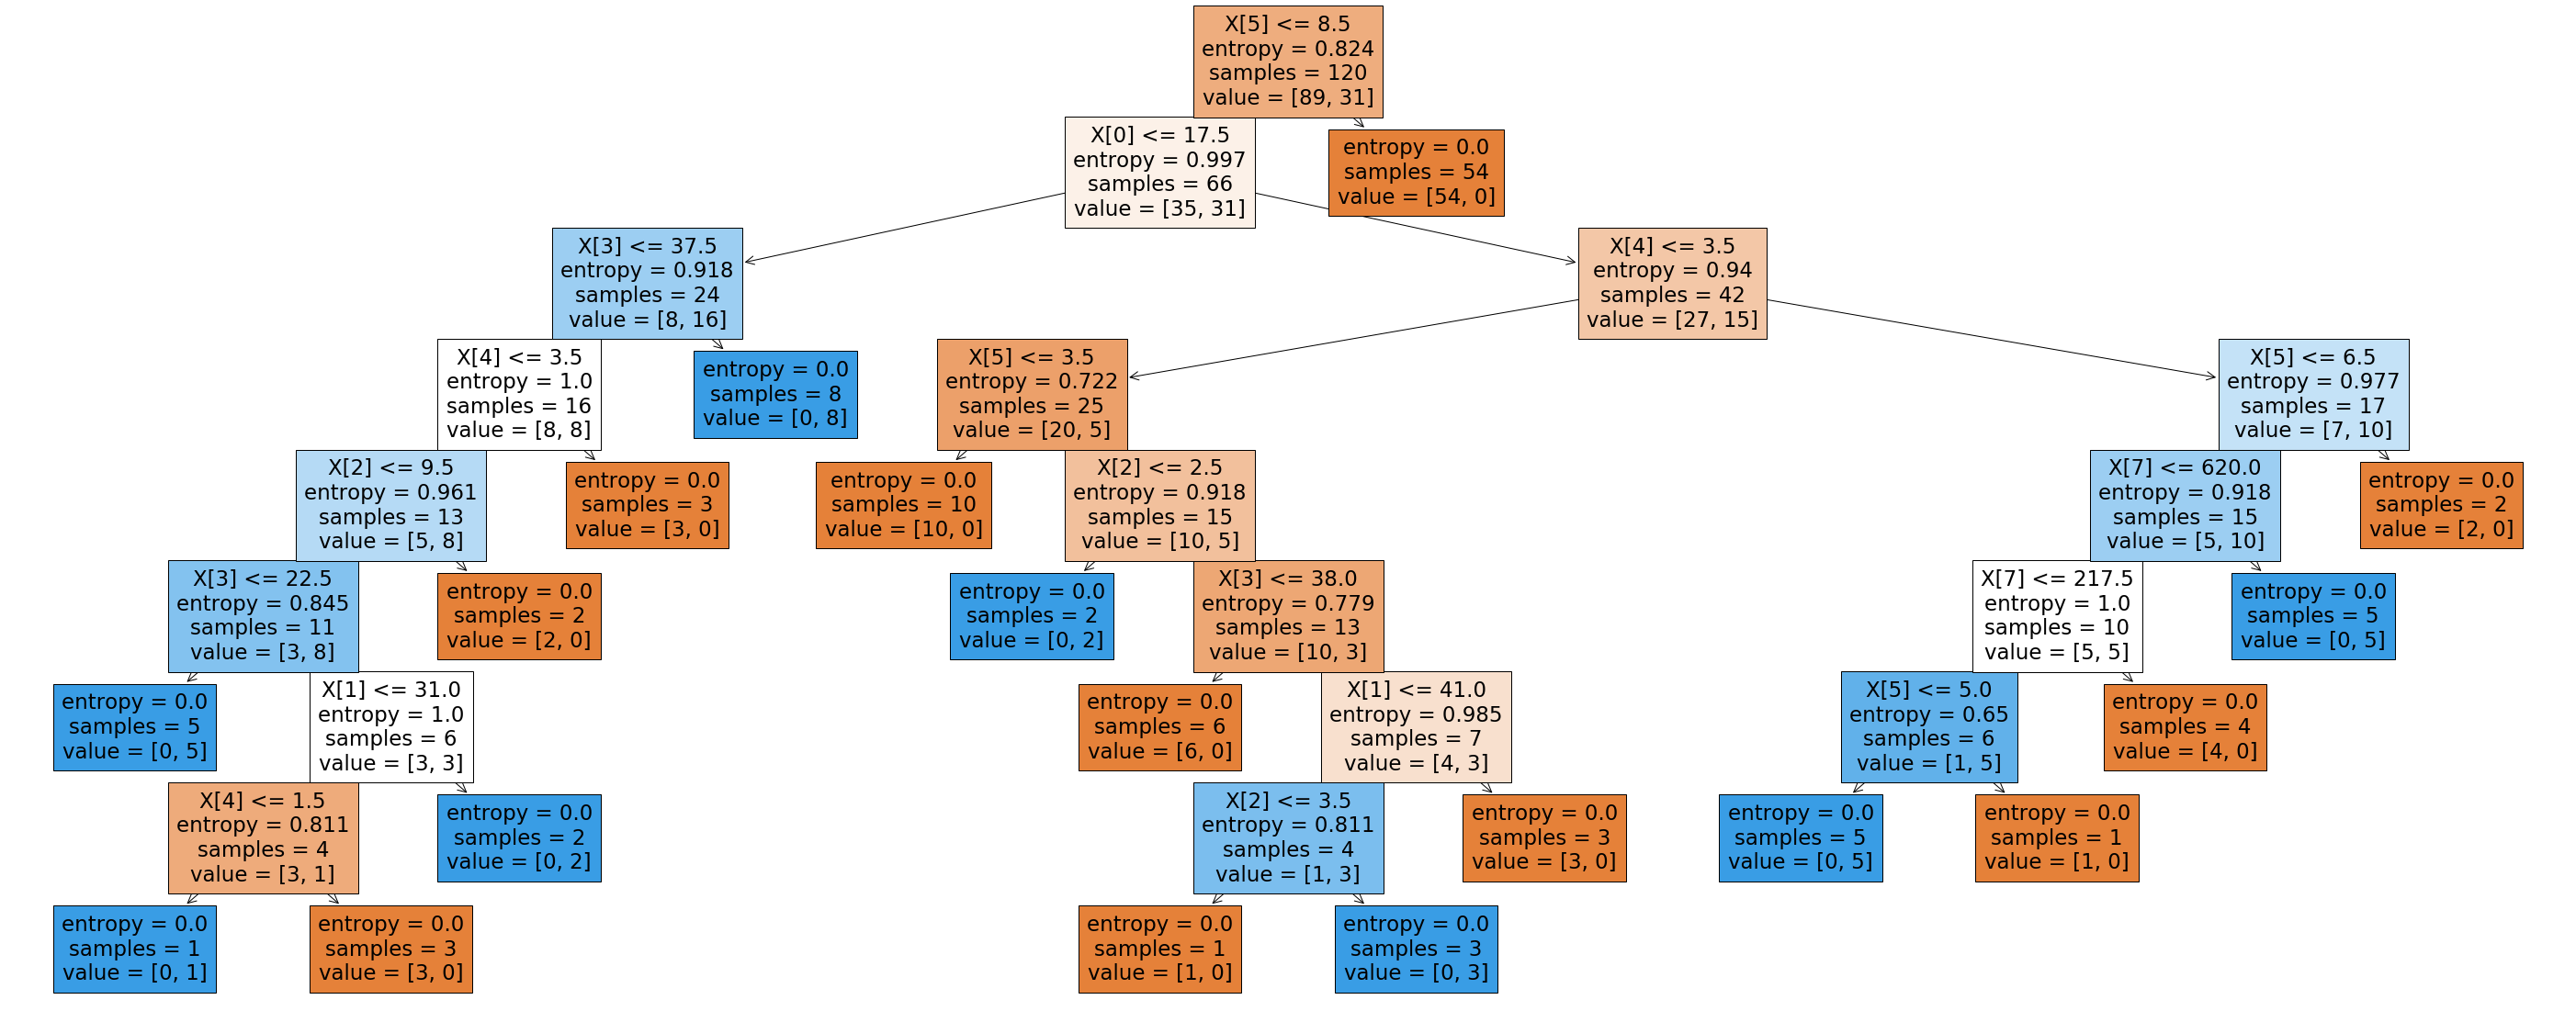

In [79]:
plt.figure(figsize = (50,20))
tree.plot_tree(obj, filled = True)

In [49]:
dt_model.predict(X_test)

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [50]:
y_pred = dt_model.predict_proba(X_test)[:,1]

In [51]:
y_new = []
for i in range(len(y_pred)):
    if y_pred[i]<=0.7:
        y_new.append(0)
    else:
        y_new.append(1)

In [52]:
from sklearn.metrics import accuracy_score

In [53]:
accuracy_score(y_test, y_new)

0.75

In [54]:
train_accuracy = []
validation_accuracy = []
for depth in range(1,10):
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=10)
    dt_model.fit(X_train, y_train)
    train_accuracy.append(dt_model.score(X_train, y_train))
    validation_accuracy.append(dt_model.score(X_test, y_test))

In [55]:
frame = pd.DataFrame({'max_depth':range(1,10), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
frame.head()

,max_depth,train_acc,valid_acc
0,1,0.741667,0.6625
1,2,0.808333,0.6875
2,3,0.833333,0.7125
3,4,0.891667,0.6875
4,5,0.925000,0.7000


In [56]:
dt_model = DecisionTreeClassifier(max_depth=8, max_leaf_nodes=25, random_state=10)

In [57]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=25, random_state=10)

In [58]:
dt_model.score(X_train, y_train)

0.9833333333333333

In [59]:
dt_model.score(X_test, y_test)

0.75

In [60]:
from sklearn import tree

In [61]:
!pip install graphviz

In [62]:
decision_tree = tree.export_graphviz(dt_model,out_file='tree.dot',feature_names=X_train.columns,max_depth=2,filled=True)

In [63]:
!dot -Tpng tree.dot -o tree.png

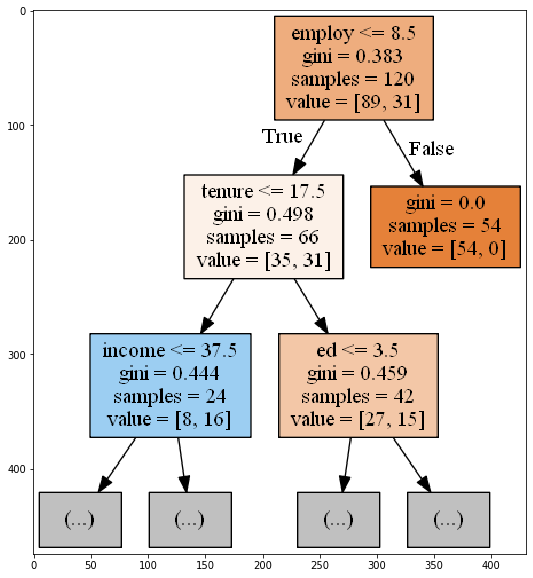

In [64]:
image = plt.imread('tree.png')
plt.figure(figsize=(10,10))
plt.imshow(image)